In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
scaler = StandardScaler()

import pandas_profiling


from datetime import datetime
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score


from sklearn.model_selection import StratifiedKFold
from imblearn.metrics import geometric_mean_score as geo
from imblearn.metrics import make_index_balanced_accuracy as iba
from sklearn.metrics import roc_curve, auc
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

In [2]:
df = pd.read_csv('failure.csv')

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
#pandas_profiling.ProfileReport(df)

In [5]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [6]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [7]:
df.nunique()

date             304
device          1168
failure            2
attribute1    123878
attribute2       558
attribute3        47
attribute4       115
attribute5        60
attribute6     44838
attribute7        28
attribute8        28
attribute9        65
dtype: int64

In [8]:
df.date = pd.to_datetime(df.date)

df['calısma_gunu']=df.date-df.date[0]
df['ay']=df['date'].dt.month
df['haftanın_gunu']=df.date.dt.weekday
df['haftanın_gunu'].replace(0,7,inplace=True)
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,calısma_gunu,ay,haftanın_gunu
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,0 days,1,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3


<AxesSubplot:xlabel='ay'>

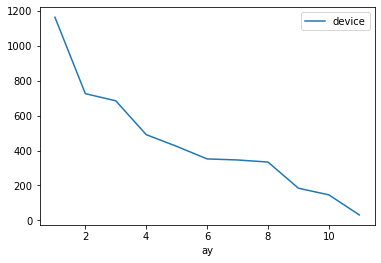

In [9]:
df.groupby('ay').agg({'device':lambda x: x.nunique()}).plot()

<AxesSubplot:xlabel='calısma_gunu'>

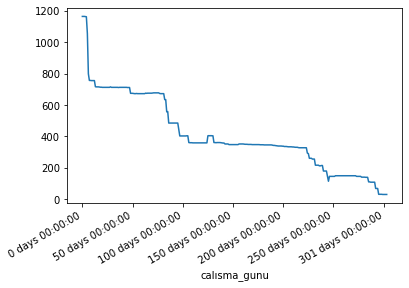

In [10]:
df.groupby('calısma_gunu')['device'].count().plot()

In [11]:
#burada tamir olup tekrar çalışmaya giren makinalar var ama bu verileri çıkarmalımıyım karar veremedim
df_date = df.groupby('device').agg({'date':max})

df_date.date.to_dict()

df_failure = df.loc[df.failure==1,['device','date']]

df_good = df.loc[df.failure==0,['device','date']]

df_date.shape,df_failure.shape

df['max_gun']=df.device.map(df_date.date.to_dict())

dff=df[(df.failure==1)&(df.date!=df.max_gun)]
dff

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,calısma_gunu,ay,haftanın_gunu,max_gun
77958,2015-05-05,S1F136J0,1,131519808,0,0,25,16,343464,8,8,0,124 days,5,1,2015-05-06
79590,2015-05-09,W1F0KCP2,1,176861128,10392,0,121,6,310699,0,0,0,128 days,5,5,2015-05-11
79601,2015-05-09,W1F0M35B,1,141805096,0,0,1,7,267203,0,0,0,128 days,5,5,2015-05-11
101999,2015-07-12,S1F0GPFZ,1,236544080,0,0,0,9,264594,0,0,0,192 days,7,6,2015-07-24
104223,2015-07-18,W1F11ZG9,1,32671632,368,9,486,3,344433,0,0,1,198 days,7,5,2015-08-17


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   date           124494 non-null  datetime64[ns] 
 1   device         124494 non-null  object         
 2   failure        124494 non-null  int64          
 3   attribute1     124494 non-null  int64          
 4   attribute2     124494 non-null  int64          
 5   attribute3     124494 non-null  int64          
 6   attribute4     124494 non-null  int64          
 7   attribute5     124494 non-null  int64          
 8   attribute6     124494 non-null  int64          
 9   attribute7     124494 non-null  int64          
 10  attribute8     124494 non-null  int64          
 11  attribute9     124494 non-null  int64          
 12  calısma_gunu   124494 non-null  timedelta64[ns]
 13  ay             124494 non-null  int64          
 14  haftanın_gunu  124494 non-null  int6

In [13]:
new_data=pd.DataFrame()

In [14]:
new_data['attribute3']=df['attribute3'].astype('category')
new_data['attribute5']=df['attribute5'].astype('category')
new_data['attribute7']=df['attribute7'].astype('category')
new_data['attribute9']=df['attribute9'].astype('category')
new_data['attribute4']=df['attribute4'].astype('category')
new_data['attribute2']=df['attribute2'].astype('category')
new_data['device']=df['device'].astype('category')
new_data['ay']=df['ay'].astype('category')

new_data['calısma_gunu']=df['calısma_gunu'].astype('int64')
new_data['attribute1']=df['attribute1']
new_data['attribute6']=df['attribute6']

new_data['failure']=df['failure']


In [15]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   attribute3    124494 non-null  category
 1   attribute5    124494 non-null  category
 2   attribute7    124494 non-null  category
 3   attribute9    124494 non-null  category
 4   attribute4    124494 non-null  category
 5   attribute2    124494 non-null  category
 6   device        124494 non-null  category
 7   ay            124494 non-null  category
 8   calısma_gunu  124494 non-null  int64   
 9   attribute1    124494 non-null  int64   
 10  attribute6    124494 non-null  int64   
 11  failure       124494 non-null  int64   
dtypes: category(8), int64(4)
memory usage: 5.1 MB


In [16]:
new_data[['calısma_gunu','attribute1','attribute6']]=scaler.fit_transform(new_data[['calısma_gunu','attribute1','attribute6']])

In [17]:
 new_data.head()

,attribute3,attribute5,attribute7,attribute9,attribute4,attribute2,device,ay,calısma_gunu,attribute1,attribute6,failure
0,0,6,0,7,52,56,S1F01085,1,-1.341926,1.323373,1.485267,0
1,3,6,0,0,0,0,S1F0166B,1,-1.341926,-0.865976,1.442262,0
2,0,12,0,0,0,0,S1F01E6Y,1,-1.341926,0.722534,-0.229740,0
3,0,6,0,0,0,0,S1F01JE0,1,-1.341926,-0.605920,1.512983,0
4,0,15,0,3,0,0,S1F01R2B,1,-1.341926,0.192788,0.534542,0


In [18]:
x=new_data[['calısma_gunu','attribute1','attribute6','ay','device','attribute2','attribute4','attribute9','attribute7','attribute5','attribute3']]

In [19]:
y=new_data[['failure']]

In [20]:
x=pd.get_dummies(x,drop_first=True)

In [21]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)

In [22]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)
x_train_res.shape,y_train_res.shape

((199010, 2047), (199010, 1))

In [23]:
y_train_res[y_train_res['failure']==1],y_train_res[y_train_res['failure']==0]

(        failure
 272           1
 944           1
 1453          1
 1963          1
 4051          1
 ...         ...
 199005        1
 199006        1
 199007        1
 199008        1
 199009        1
 
 [99505 rows x 1 columns],
        failure
 0            0
 1            0
 2            0
 3            0
 4            0
 ...        ...
 99590        0
 99591        0
 99592        0
 99593        0
 99594        0
 
 [99505 rows x 1 columns])

In [24]:
x_train_res

,calısma_gunu,attribute1,attribute6,ay_2,ay_3,ay_4,ay_5,ay_6,ay_7,ay_8,...,attribute3_323,attribute3_377,attribute3_382,attribute3_406,attribute3_1162,attribute3_1326,attribute3_1331,attribute3_2112,attribute3_2693,attribute3_24929
0,-1.252654,-1.089696,-2.623613,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.203461,1.223075,0.860853,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.048603,1.351467,-2.603331,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.410944,-1.720796,0.116481,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.921071,-1.644278,-0.477504,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199005,-0.674010,1.277452,-2.543548,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199006,-0.944101,0.793563,0.645983,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199007,-1.141719,0.556188,0.490612,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199008,0.326644,0.531251,0.502633,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
g=GaussianNB()
b=BernoulliNB()
k=KNeighborsClassifier()
log=LogisticRegression()
gbc=GradientBoostingClassifier()
r=RandomForestClassifier()
d=DecisionTreeClassifier()

In [29]:
algorithms=[g,b,k,log,gbc,r,d]
names=['GaussianNB','BernoulliNB','K Nearest','Logistic','GradientBoosting','RandomForest','DecisionTree'] 
def algo_test (A,b,algorithms=algorithms,names=names):
    # fit the data 
    for i in range(len(algorithms)):
        algorithms[i]=algorithms[i].fit(A,b)
    accuracy=[]
    precision=[]
    recall=[]
    f1=[]
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y,algorithms[i].predict(x)))
        precision.append(precision_score(y,algorithms[i].predict(x)))
        recall.append(recall_score(y,algorithms[i].predict(x)))
        f1.append(f1_score(y,algorithms[i].predict(x)))
    metrics=pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'],index=names)
    metrics['Accuracy']=accuracy 
    metrics['Precision']=precision 
    metrics['Recall']=recall 
    metrics['F1']=f1
    return metrics.sort_values('F1',ascending=False)  

In [30]:
algo_test(x_train_res,y_train_res)

C:\Users\behlul\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\behlul\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\behlul\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\behlul\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passe

,Accuracy,Precision,Recall,F1
GaussianNB,0.999253,0.882353,0.141509,NaN
BernoulliNB,0.997663,0.015707,0.028302,NaN
K Nearest,0.997341,0.081784,0.207547,NaN
Logistic,0.998185,0.016129,0.018868,NaN
GradientBoosting,0.871014,0.003115,0.471698,NaN
RandomForest,0.999863,0.989011,0.849057,NaN
DecisionTree,0.999510,0.666667,0.849057,NaN
